In [1]:
import numpy as np
import control 
from matplotlib import pyplot as plt 


In [2]:
#Strecke Definition
def myPlant(P,List):
    if List ==  1:
        sys = control.tf([P[0]],[P[1], P[2]]);
    else: 
        printf('eRROR')
    return sys;


In [3]:
P = [1, 1000, 50]
List = 1
sys = myPlant(P,List)
print(sys)



     1
-----------
1000 s + 50



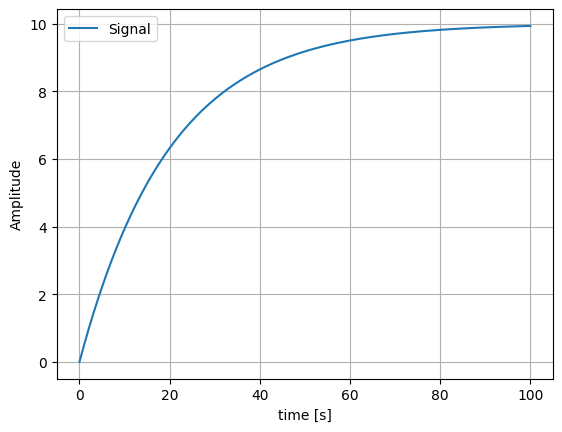

In [4]:
T = np.arange(0,100,0.01)
u = 500;
t,ySim = control.step_response(u*sys,T)

plt.plot(t,ySim,label = 'Signal')
plt.xlabel('time [s]')
plt.ylabel('Amplitude')
plt.grid()
plt.legend()
plt.show()

In [5]:
Characteristic = control.damp(sys);
print('')
print('======= Actual Stand =======')
Info = control.step_info(sys,T)

for k in Info:
    print(f"{k}: {Info[k]:3}")

    Eigenvalue (pole)       Damping     Frequency
                -0.05             1          0.05

======= Actual Stand =======
RiseTime: 43.95
SettlingTime: 78.25
SettlingMin: 0.01800082964188743
SettlingMax: 0.02
Overshoot:   0
Undershoot:   0
Peak: 0.01986517366369896
PeakTime: 99.99000000000001
SteadyStateValue: 0.02


In [6]:
##Performance specifications
#Rise time < 5 s
#Overshoot < 10%
#Steady-state error < 2%

In [7]:
# Target Specification
# Steady State error 
valDC = control.dcgain(sys)
Target = 2/100;
Kp_req = (1-Target)/(Target*valDC);
print('In order to reach the desired steady state, K shall: ' + str (Kp_req))
Kp = Kp_req


In order to reach the desired steady state, K shall: 2450.0


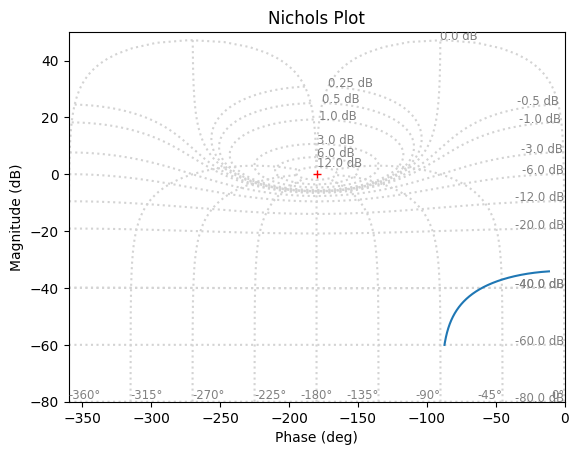

In [8]:
out = control.nichols(sys)

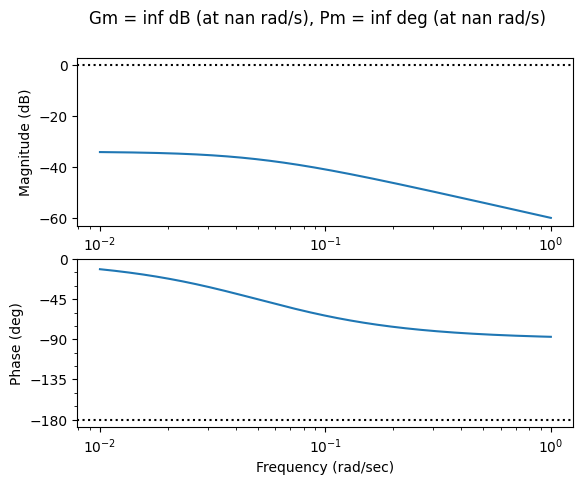

In [9]:
out = control.bode_plot(sys, margins = True, dB = True, grid = True)

In [10]:
gm, pm, wcg, wcp = control.margin(sys)
print('Gain Margin at ' + str(wcg) + ' rad/s, Gain = ' + str(gm) +' dB/dec')
print('Phase Margin at ' + str(wcp) + ' rad/s, Phase = ' + str(pm) +' deg')

Gain Margin at nan rad/s, Gain = inf dB/dec
Phase Margin at nan rad/s, Phase = inf deg


In [11]:
#omega = np.arange(0,100,0.01)
#mag, phase, omega = control.frequency_response(sys,omega)
#print('Magnitude at DC, mag =  ' + str(control.mag2db(mag[0])) + ' dB/dec')
#Kp = np.round((control.db2mag(-1*control.mag2db(mag[0]))),4)
#print('Kp =  ' + str(Kp))

Kp =  2450.0


NameError: name 'omega' is not defined

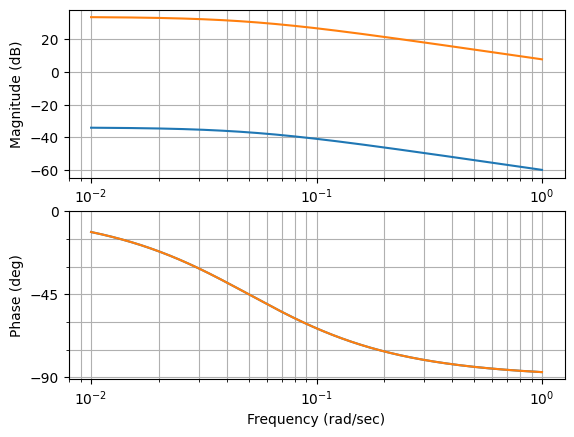

In [12]:
# control.bode(sys,Kp,sys*Kp,label = ['sys','Kp','sys*Kp'])
#mag, phase, omega = control.bode([sys,Kp*sys])
print('Kp =  ' + str(Kp))

OL = Kp*sys;
out = control.bode_plot([sys,OL],label = ['Sys','Sys * Kp'],dB = True)


mag, phase, omega = control.frequency_response(OL,omega)
print('Magnitude at DC, OL =  ' + str(np.round(control.mag2db(mag[0]),4)) + ' dB/dec')


     2.45e+06 s + 1.225e+05
---------------------------------
1e+06 s^2 + 2.55e+06 s + 1.25e+05



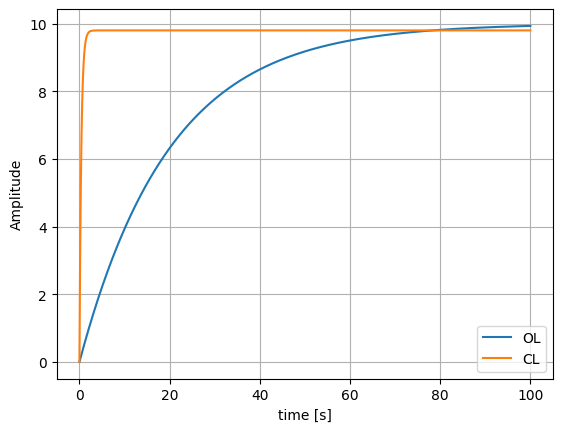

In [13]:
CL = OL/(1+OL)
R = 10;
print(CL)

tCL,yCL = control.step_response(R*CL,t)

plt.plot(t,ySim, label = ['OL'])
plt.plot(tCL,yCL, label = ['CL'])
plt.xlabel('time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()

In [14]:
print('======= With P-Controller =======')
Info = control.step_info(R*CL,t)

for k in Info:
    print(f"{k}: {Info[k]:3}")

======= With P-Controller =======
RiseTime: 0.88
SettlingTime: 1.57
SettlingMin: 8.841722248296795
SettlingMax: 9.800000000000008
Overshoot: 9.06304509898087e-14
Undershoot:   0
Peak: 9.800000000000008
PeakTime: 23.44
SteadyStateValue: 9.799999999999999


In [ ]:
# Step 2: LAG COmpensator -- Larger low frequency gain to reduce the steady-state error and keep the same bandwidth frequency to maintain the desired rise time.

In [15]:
Kp = 1000;
zo = 0.1;
po = 0.02;

s = control.tf('s');
C_lag = (s+zo)/(s+po);

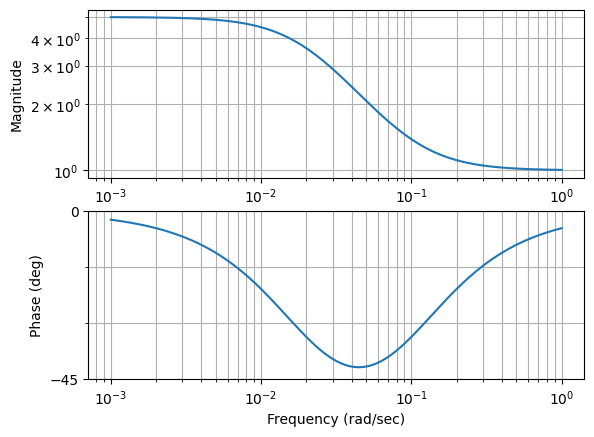

In [16]:
out = control.bode_plot(C_lag)


     2.45e+06 s + 1.225e+05
---------------------------------
1e+06 s^2 + 2.55e+06 s + 1.25e+05



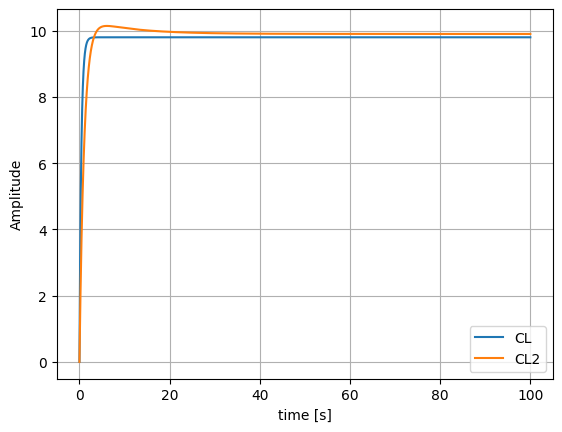

In [17]:
OL = sys*C_lag * Kp
CL2 = OL/(1+OL)
R = 10;
print(CL)

tCL2,yCL2 = control.step_response(R*CL2,t)

plt.plot(tCL,yCL, label = ['CL'])
plt.plot(tCL2,yCL2, label = ['CL2'])
plt.xlabel('time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()

In [18]:
print('======= With LAg - Controller =======')
Info = control.step_info(R*CL2,t)

for k in Info:
    print(f"{k}: {Info[k]:3}")

======= With LAg - Controller =======
RiseTime: 1.97
SettlingTime: 9.03
SettlingMin: 8.915679872124256
SettlingMax: 10.143280007885496
Overshoot: 2.447128079643507
Undershoot:   0
Peak: 10.143280007885496
PeakTime: 6.08
SteadyStateValue: 9.900990099009901
